<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/01.%20Week%201/%20Notebook/%2001.First_Step_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

In [ ]:
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

In [ ]:
print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [ ]:
def f(x, phi0, phi1):
    y = phi0 + phi1 * x # y = mx + b
    return y

In [ ]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, x')
    ax.set_ylabel('Output, y')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

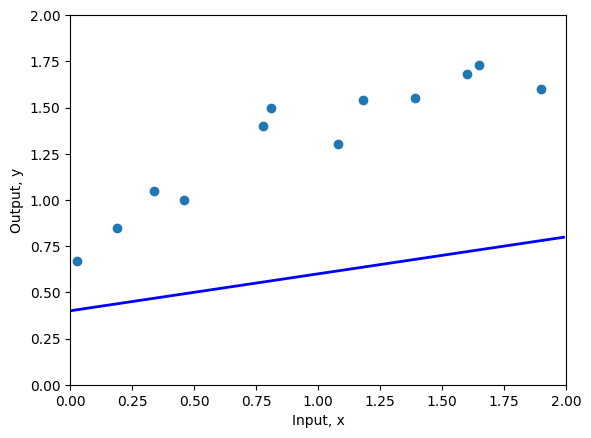

In [ ]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [ ]:
def compute_loss(x, y, phi0, phi1):
    m = len(x)  # Number of training samples
    predictions = phi0 + phi1 * x  # Compute model predictions for all samples
    loss = (1/(2*m)) * ((predictions - y) ** 2).sum()  # Compute mean squared error
    return loss

In [ ]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 0.29, Ground truth =7.07


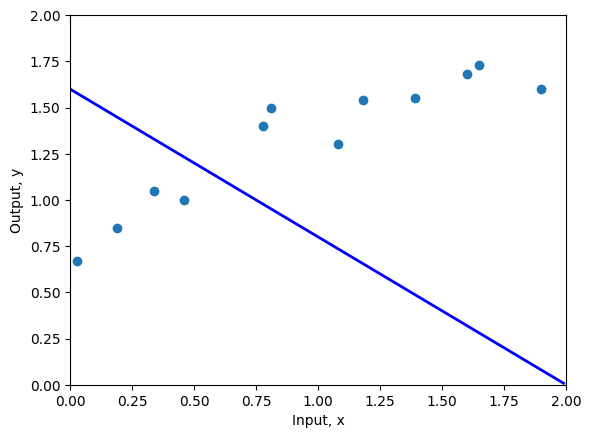

Your Loss = 0.43, Ground truth =10.28


In [ ]:

# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

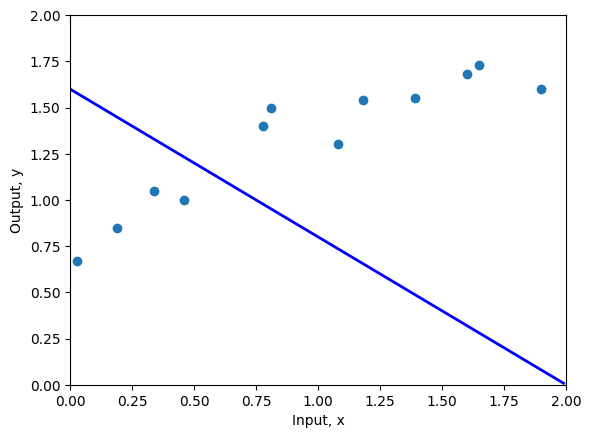

Your Loss = 0.43


In [ ]:
# Start with the given parameter values
phi0 = 1.60
phi1 = -0.8

# Plot the data and the initial model prediction
plot(x, y, phi0, phi1)

# Calculate and print the loss with the current parameters
print(f'Your Loss = {compute_loss(x, y, phi0, phi1):3.2f}')

In [ ]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])

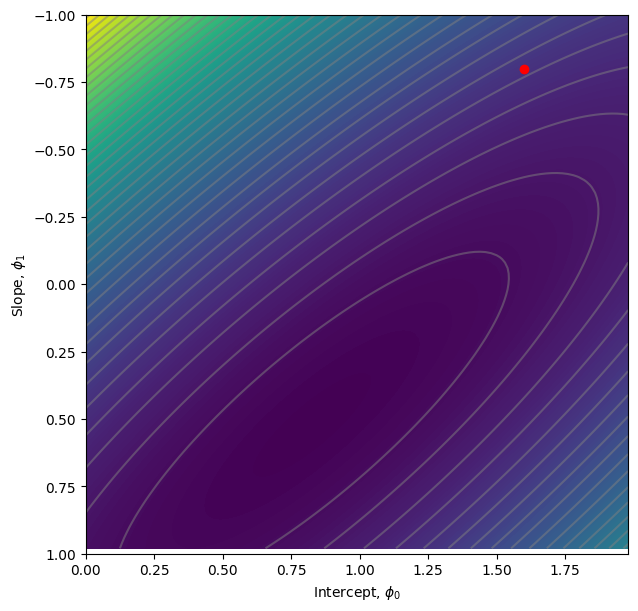

In [ ]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7, 7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses, levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses, levels, colors=['#80808080'])
ax.set_ylim([1, -1])
ax.set_xlabel(r'Intercept, $\phi_0$')
ax.set_ylabel(r'Slope, $\phi_1$')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0, phi1, 'ro')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 1D linear regression model
def f(x, phi0, phi1):
    return phi0 + phi1 * x

# Define the loss function (Mean Squared Error with a 1/(2*m) factor)
def compute_loss(x, y, phi0, phi1):
    m = len(x)  # Number of training samples
    predictions = f(x, phi0, phi1)
    loss = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return loss

# Compute gradients for phi0 and phi1
def compute_gradients(x, y, phi0, phi1):
    m = len(x)
    predictions = f(x, phi0, phi1)
    # Gradient with respect to phi0
    dphi0 = (1/m) * np.sum(predictions - y)
    # Gradient with respect to phi1
    dphi1 = (1/m) * np.sum((predictions - y) * x)
    return dphi0, dphi1

In [ ]:
# Gradient Descent function with visualization at each epoch
def gradient_descent(x, y, phi0, phi1, learning_rate=0.1, iterations=1000):
    losses = []
    for epoch in range(iterations):
        # Compute gradients
        dphi0, dphi1 = compute_gradients(x, y, phi0, phi1)

        # Update parameters
        phi0 -= learning_rate * dphi0
        phi1 -= learning_rate * dphi1

        # Compute loss and save it
        loss = compute_loss(x, y, phi0, phi1)
        losses.append(loss)

        # Visualize regression after every epoch
        if epoch % 100 == 0 or epoch == iterations - 1:  # Visualize every 100th epoch
            plt.figure(figsize=(7, 5))
            plt.scatter(x, y, label='Data', color='blue')
            plt.plot(x, f(x, phi0, phi1), 'r-', label=f'Epoch {epoch+1} Fit')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title(f'Regression Visualization - Epoch {epoch+1}')
            plt.legend()
            plt.show()

    return phi0, phi1, losses

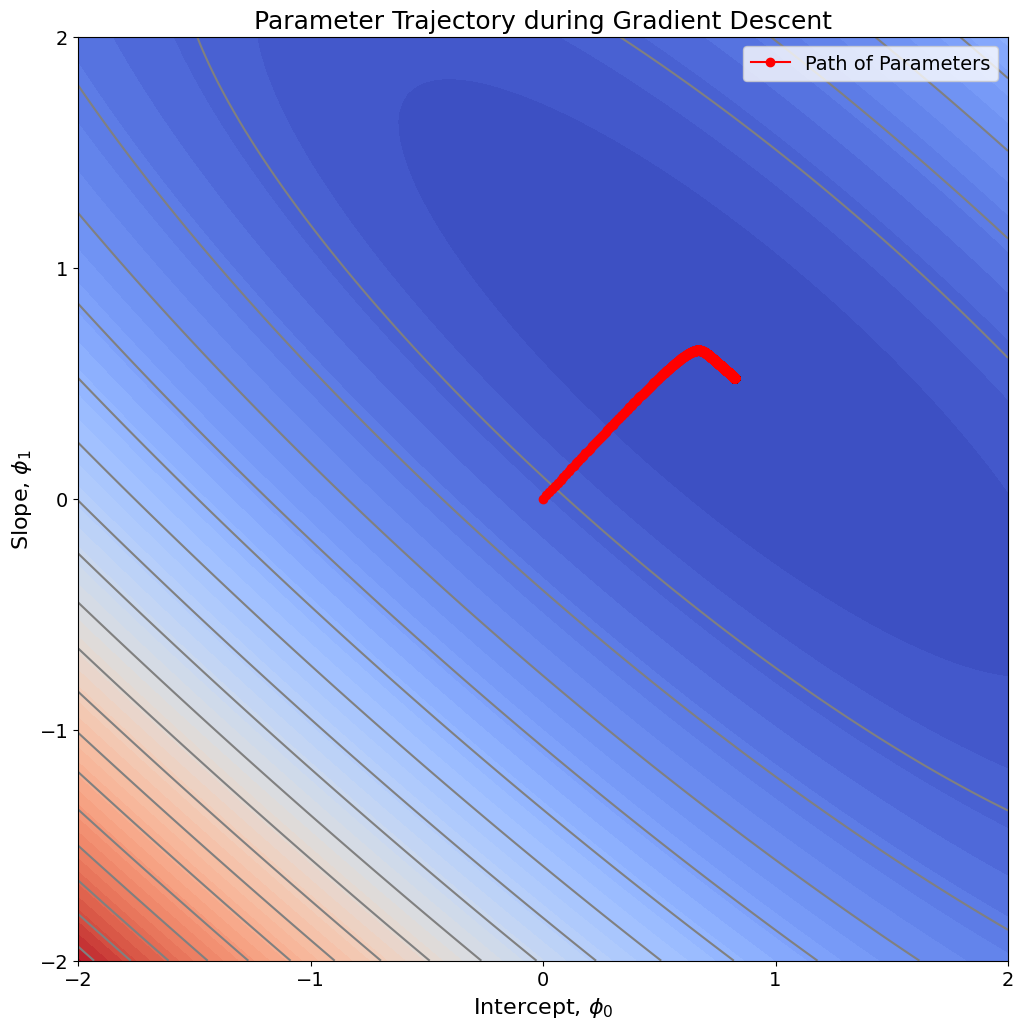

Optimal phi0: 0.826
Optimal phi1: 0.522


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 1D linear regression model
def f(x, phi0, phi1):
    return phi0 + phi1 * x

# Define the loss function (Mean Squared Error with a 1/(2*m) factor)
def compute_loss(x, y, phi0, phi1):
    m = len(x)  # Number of training samples
    predictions = f(x, phi0, phi1)
    loss = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return loss

# Compute gradients for phi0 and phi1
def compute_gradients(x, y, phi0, phi1):
    m = len(x)
    predictions = f(x, phi0, phi1)
    # Gradient with respect to phi0
    dphi0 = (1/m) * np.sum(predictions - y)
    # Gradient with respect to phi1
    dphi1 = (1/m) * np.sum((predictions - y) * x)
    return dphi0, dphi1

# Gradient Descent function with visualization at each epoch
def gradient_descent_visualization(x, y, phi0, phi1, learning_rate=0.1, iterations=1000):
    # Set up the figure with a larger size
    fig, ax = plt.subplots(figsize=(12, 12))  # Increased size for better visibility
    ax.set_xlabel(r'Intercept, $\phi_0$', fontsize=16)
    ax.set_ylabel(r'Slope, $\phi_1$', fontsize=16)

    # Create a grid of phi0 and phi1 values for the loss surface (extended range)
    phi0_vals = np.linspace(-2, 2, 100)  # Increase range for better visibility
    phi1_vals = np.linspace(-2, 2, 100)  # Increase range for better visibility
    phi0_mesh, phi1_mesh = np.meshgrid(phi0_vals, phi1_vals)

    # Compute loss values for each point in the grid
    all_losses = np.zeros(phi0_mesh.shape)
    for i in range(phi0_mesh.shape[0]):
        for j in range(phi0_mesh.shape[1]):
            all_losses[i, j] = compute_loss(x, y, phi0_mesh[i, j], phi1_mesh[i, j])

    # Plot the loss function as a heatmap with improved contrast and more range
    levels = 50  # Increased number of contour levels for better visualization
    ax.contourf(phi0_mesh, phi1_mesh, all_losses, levels, cmap='coolwarm')  # Color map 'coolwarm'
    ax.contour(phi0_mesh, phi1_mesh, all_losses, 20, colors='gray')  # More contour lines

    # Track the parameters across all epochs
    param_history = [(phi0, phi1)]

    # Perform gradient descent and store the parameters after each epoch
    for epoch in range(iterations):
        # Compute gradients
        dphi0, dphi1 = compute_gradients(x, y, phi0, phi1)

        # Update parameters
        phi0 -= learning_rate * dphi0
        phi1 -= learning_rate * dphi1

        # Save the updated parameters at this epoch
        param_history.append((phi0, phi1))

    # Plot the trajectory of the parameters (dots for each epoch)
    param_history = np.array(param_history)
    ax.plot(param_history[:, 0], param_history[:, 1], 'ro-', markersize=6, label="Path of Parameters")

    # Adjust axis limits for better visibility
    ax.set_xlim(-2, 2)  # Set x-axis limits to focus on the full range
    ax.set_ylim(-2, 2)  # Set y-axis limits to focus on the full range

    # Adjust tick marks and labels
    ax.set_xticks(np.linspace(-2, 2, 5))  # Set x-axis ticks
    ax.set_yticks(np.linspace(-2, 2, 5))  # Set y-axis ticks
    ax.tick_params(axis='both', labelsize=14)  # Adjust tick label size

    plt.title("Parameter Trajectory during Gradient Descent", fontsize=18)
    plt.legend(loc='upper right', fontsize=14)

    plt.show()

    return phi0, phi1

# Example data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6])

# Initialize phi0 and phi1
phi0 = 0  # initial guess for intercept
phi1 = 0  # initial guess for slope

# Perform gradient descent and visualize the parameters after every epoch
phi0_opt, phi1_opt = gradient_descent_visualization(x, y, phi0, phi1, learning_rate=0.01, iterations=10000)

# Print the final optimal parameters
print(f"Optimal phi0: {phi0_opt:.3f}")
print(f"Optimal phi1: {phi1_opt:.3f}")